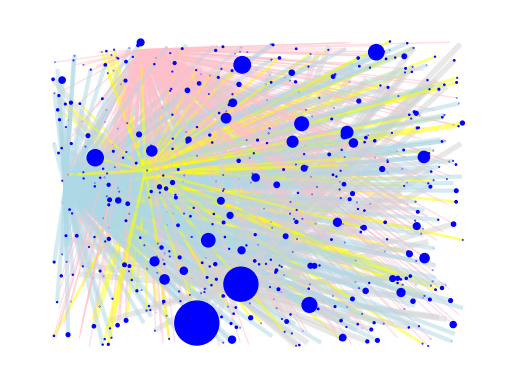

Se dibujaron 932 vértices de Coin ID
Número de aristas de categoría 'Meme': 423
Número de aristas de categoría 'Artificial Intelligence (AI)': 135
Número de aristas de categoría 'Gaming (GameFi)': 288
Número de aristas de categoría 'Real World Assets (RWA)': 106


In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import ast

# Cargar datos desde los archivos CSV
dataset_tokens = pd.read_csv('datasettokens.csv')
exchange_cryptos = pd.read_csv('exchange_cryptos.csv')

# Crear un grafo bipartito
B = nx.Graph()

# Agregar nodos de Coin ID y Exchange
B.add_nodes_from(dataset_tokens['Coin ID'], bipartite=0)
B.add_nodes_from(exchange_cryptos['Exchange'], bipartite=1)

# Crear un diccionario para almacenar la capitalización total de mercado por Coin ID
market_cap_dict = dict(zip(dataset_tokens['Coin ID'], dataset_tokens['Capitalización total de mercado (market cap)']))

# Crear un diccionario para almacenar la cantidad total en el Exchange por Exchange
exchange_total_dict = exchange_cryptos.groupby('Exchange')['Cantidad en el Exchange (USD)'].sum().to_dict()

# Dibujar nodos con diferentes tamaños
coin_id_sizes = [market_cap_dict.get(node, 0) for node in B.nodes if node in dataset_tokens['Coin ID'].values]
exchange_sizes = [exchange_total_dict.get(node, 0) for node in B.nodes if node in exchange_cryptos['Exchange'].values]

# Normalizar tamaños
coin_id_max_size = max(coin_id_sizes)
coin_id_sizes_normalized = [1000 * size / coin_id_max_size for size in coin_id_sizes]  # Escalar para un mejor visualización
exchange_max_size = max(exchange_sizes)
exchange_sizes_normalized = [1000 * size / exchange_max_size for size in exchange_sizes]  # Escalar para un mejor visualización

# Función para obtener las categorías de un nodo Coin ID
def get_categories(coin_id):
    categories_str = dataset_tokens.loc[dataset_tokens['Coin ID'] == coin_id, 'Categorías'].values[0]
    return ast.literal_eval(categories_str) if pd.notnull(categories_str) else []

# Crear un diccionario para mapear las categorías a colores y pesos
category_color_weight = {
    "Meme": ("pink", 1),
    "Artificial Intelligence (AI)": ("yellow", 2),
    "Gaming (GameFi)": ("lightblue", 3),
    "Real World Assets (RWA)": ("lightgrey", 4)
}

# Contadores para las aristas por categoría
category_edge_count = {category: 0 for category in category_color_weight}

# Agregar relaciones entre los vértices de Coin ID según las categorías
for coin_id in dataset_tokens['Coin ID']:
    categories = get_categories(coin_id)
    for category in categories:
        if category in category_color_weight:
            color, weight = category_color_weight[category]
            B.add_edge(coin_id, category, color=color, weight=weight)
            category_edge_count[category] += 1

# Dibujar aristas
edge_colors = [B[u][v]['color'] for u, v in B.edges]
edge_weights = [B[u][v]['weight'] for u, v in B.edges]

# Dibujar grafo
pos = nx.random_layout(B)  # Posiciones de los nodos
nx.draw_networkx_nodes(B, pos, nodelist=[node for node in B.nodes if node in dataset_tokens['Coin ID'].values],
                       node_size=coin_id_sizes_normalized, node_color='blue')
nx.draw_networkx_nodes(B, pos, nodelist=[node for node in B.nodes if node in exchange_cryptos['Exchange'].values],
                       node_size=exchange_sizes_normalized, node_color='green', alpha=0)  # Hacer los nodos de Exchange invisibles
nx.draw_networkx_edges(B, pos, edge_color=edge_colors, width=edge_weights, alpha=0.5)
plt.axis('off')
plt.show()

# Contar el número de nodos de Coin ID y Exchange
num_coin_id = len([node for node, attr in B.nodes(data=True) if 'bipartite' in attr and attr['bipartite'] == 0])
num_exchange = len(B) - num_coin_id

# Mostrar el número de nodos de Coin ID y Exchange
print(f"Se dibujaron {num_coin_id} vértices de Coin ID")

# Mostrar el número de aristas por categoría
for category, count in category_edge_count.items():
    print(f"Número de aristas de categoría '{category}': {count}")



